In [1]:
import pandas as pd
import numpy as np
import utils as ut

import matplotlib.pyplot as plt
import seaborn as sns


from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, AllChem, Draw

from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest, StackingClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance

#from lazypredict.Supervised import LazyClassifier

import pickle

from chembl_webresource_client.new_client import new_client

In [2]:
target = new_client.target
target_query = target.search('15-lipoxygenase')
target_df = pd.DataFrame.from_dict(target_query)

In [3]:
target_df

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'ALOX15B', 'xref_name': None, 'xr...",Homo sapiens,"Arachidonate 15-lipoxygenase, type II",30.0,False,CHEMBL2457,"[{'accession': 'O15296', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'Q8K4F2', 'xref_name': None, 'xre...",Rattus norvegicus,"Arachidonate 15-lipoxygenase, type II",30.0,False,CHEMBL3289,"[{'accession': 'Q8K4F2', 'component_descriptio...",SINGLE PROTEIN,10116
2,"[{'xref_id': 'P16469', 'xref_name': None, 'xre...",Sus scrofa,Arachidonate 12-lipoxygenase,29.0,False,CHEMBL2381,"[{'accession': 'P16469', 'component_descriptio...",SINGLE PROTEIN,9823
3,"[{'xref_id': 'P16050', 'xref_name': None, 'xre...",Homo sapiens,Arachidonate 15-lipoxygenase,28.0,False,CHEMBL2903,"[{'accession': 'P16050', 'component_descriptio...",SINGLE PROTEIN,9606
4,"[{'xref_id': 'P12530', 'xref_name': None, 'xre...",Oryctolagus cuniculus,Arachidonate 15-lipoxygenase,28.0,False,CHEMBL4358,"[{'accession': 'P12530', 'component_descriptio...",SINGLE PROTEIN,9986
...,...,...,...,...,...,...,...,...,...
123,[],Homo sapiens,Aurora kinase A/B,2.0,False,CHEMBL3883303,"[{'accession': 'Q96GD4', 'component_descriptio...",PROTEIN FAMILY,9606
124,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049
125,[],Homo sapiens,Mitochondrial complex I (NADH dehydrogenase),1.0,False,CHEMBL2363065,"[{'accession': 'P03923', 'component_descriptio...",PROTEIN COMPLEX,9606
126,[],Homo sapiens,Cyclin-dependent kinase,1.0,False,CHEMBL3559691,"[{'accession': 'P06493', 'component_descriptio...",PROTEIN FAMILY,9606


In [4]:
target_df[(target_df['target_type']=='SINGLE PROTEIN') & (target_df['organism']=='Homo sapiens')] 

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'ALOX15B', 'xref_name': None, 'xr...",Homo sapiens,"Arachidonate 15-lipoxygenase, type II",30.0,False,CHEMBL2457,"[{'accession': 'O15296', 'component_descriptio...",SINGLE PROTEIN,9606
3,"[{'xref_id': 'P16050', 'xref_name': None, 'xre...",Homo sapiens,Arachidonate 15-lipoxygenase,28.0,False,CHEMBL2903,"[{'accession': 'P16050', 'component_descriptio...",SINGLE PROTEIN,9606
8,"[{'xref_id': 'P18054', 'xref_name': None, 'xre...",Homo sapiens,Arachidonate 12-lipoxygenase,17.0,False,CHEMBL3687,"[{'accession': 'P18054', 'component_descriptio...",SINGLE PROTEIN,9606
10,"[{'xref_id': 'P09917', 'xref_name': None, 'xre...",Homo sapiens,Arachidonate 5-lipoxygenase,16.0,False,CHEMBL215,"[{'accession': 'P09917', 'component_descriptio...",SINGLE PROTEIN,9606
21,[],Homo sapiens,Interleukin-15,13.0,False,CHEMBL3712954,"[{'accession': 'P40933', 'component_descriptio...",SINGLE PROTEIN,9606
23,"[{'xref_id': 'P20292', 'xref_name': None, 'xre...",Homo sapiens,5-lipoxygenase activating protein,12.0,False,CHEMBL4550,"[{'accession': 'P20292', 'component_descriptio...",SINGLE PROTEIN,9606
24,"[{'xref_id': 'Q96QU1', 'xref_name': None, 'xre...",Homo sapiens,Protocadherin-15,12.0,False,CHEMBL6112,"[{'accession': 'Q96QU1', 'component_descriptio...",SINGLE PROTEIN,9606
25,"[{'xref_id': 'Q6ZN16', 'xref_name': None, 'xre...",Homo sapiens,Mitogen-activated protein kinase kinase kinase 15,12.0,False,CHEMBL1163127,"[{'accession': 'Q6ZN16', 'component_descriptio...",SINGLE PROTEIN,9606
27,[],Homo sapiens,Disintegrin and metalloproteinase domain-conta...,12.0,False,CHEMBL2331050,"[{'accession': 'Q13444', 'component_descriptio...",SINGLE PROTEIN,9606
29,[],Homo sapiens,Nucleotide triphosphate diphosphatase NUDT15,12.0,False,CHEMBL4105827,"[{'accession': 'Q9NV35', 'component_descriptio...",SINGLE PROTEIN,9606


In [5]:
target = target_df.target_chembl_id[3]
target

'CHEMBL2903'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=target)

lox = pd.DataFrame.from_dict(res)
lox

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,232660,[],CHEMBL615145,The compound was tested for the in vitro inhib...,B,None,None,BAO_0000201,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,None,None,Inhibition,%,UO_0000187,None,22.0
1,None,None,243163,[],CHEMBL615145,The compound was tested for the in vitro inhib...,B,None,None,BAO_0000201,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,None,None,Inhibition,%,UO_0000187,None,50.0
2,None,None,248509,[],CHEMBL872867,The compound was tested for the in vitro inhib...,B,None,None,BAO_0000201,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,None,None,Inhibition,%,UO_0000187,None,52.0
3,None,None,252702,[],CHEMBL872867,The compound was tested for the in vitro inhib...,B,None,None,BAO_0000201,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,None,None,Inhibition,%,UO_0000187,None,44.0
4,None,None,255410,[],CHEMBL615145,The compound was tested for the in vitro inhib...,B,None,None,BAO_0000201,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,None,None,Inhibition,%,UO_0000187,None,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,None,None,24406780,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5045051,Ratio of inhibition of recombinant human N-ter...,B,None,None,BAO_0000193,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,None,None,Ratio,None,None,None,0.18
7075,None,None,24406781,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5045052,Ratio of inhibition of recombinant human N-ter...,B,None,None,BAO_0000193,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,None,None,Ratio,None,None,None,0.14
7076,None,None,24406798,[],CHEMBL5045063,Selectivity ratio of IC50 for Inhibition of re...,B,None,None,BAO_0000179,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,None,None,Ratio IC50,None,None,None,0.16
7077,"{'action_type': 'INHIBITOR', 'description': 'N...",Active,24406804,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5045069,Effect on human wild type ALOX15-mediated prod...,B,None,None,BAO_0000375,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,None,None,Activity,None,None,None,None


In [7]:
lox.to_csv('lox_bioactivity_data_raw.csv', index=False)

In [8]:
#Start executing the cells from here if you already collected the records from the chEMBL!

In [9]:
#load the df

lox = pd.read_csv('lox_bioactivity_data_raw.csv')
lox.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,232660,[],CHEMBL615145,The compound was tested for the in vitro inhib...,B,NaN,NaN,BAO_0000201,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,NaN,NaN,Inhibition,%,UO_0000187,NaN,22.0
1,NaN,NaN,243163,[],CHEMBL615145,The compound was tested for the in vitro inhib...,B,NaN,NaN,BAO_0000201,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,NaN,NaN,Inhibition,%,UO_0000187,NaN,50.0
2,NaN,NaN,248509,[],CHEMBL872867,The compound was tested for the in vitro inhib...,B,NaN,NaN,BAO_0000201,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,NaN,NaN,Inhibition,%,UO_0000187,NaN,52.0
3,NaN,NaN,252702,[],CHEMBL872867,The compound was tested for the in vitro inhib...,B,NaN,NaN,BAO_0000201,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,NaN,NaN,Inhibition,%,UO_0000187,NaN,44.0
4,NaN,NaN,255410,[],CHEMBL615145,The compound was tested for the in vitro inhib...,B,NaN,NaN,BAO_0000201,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,NaN,NaN,Inhibition,%,UO_0000187,NaN,34.0


In [10]:
lox['standard_type'].value_counts()

standard_type
Potency       5440
IC50           633
Activity       464
Inhibition     256
Imax           164
Ki              87
AC50             6
Vmax(app)        4
EC50             4
Km               4
Ratio IC50       3
Kd               3
%max             3
INH              2
Ratio            2
Kic              1
K                1
Ratio Ki         1
Kiuc             1
Name: count, dtype: int64

In [11]:
#limit dataset to those whose 'standard_type' is 'IC50'
lox = lox.loc[lox['standard_type']=='IC50'] #what is standard type! 
lox.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
6,NaN,NaN,347101,[],CHEMBL800469,Inhibitory activity against rabbit reticulocyt...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.4
7,NaN,NaN,349716,[],CHEMBL800469,Inhibitory activity against rabbit reticulocyt...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.4
8,NaN,NaN,351222,[],CHEMBL800469,Inhibitory activity against rabbit reticulocyt...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,4.9
9,NaN,NaN,354099,[],CHEMBL800469,Inhibitory activity against rabbit reticulocyt...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,25.0
10,NaN,NaN,359860,[],CHEMBL800469,Inhibitory activity against rabbit reticulocyt...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Arachidonate 15-lipoxygenase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,25.0


In [12]:
#look at datatype and null valyes for standards features! 

standards = [ x for x in lox.columns if 'standard' in x]
lox[standards].info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 6 to 7072
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   standard_flag         633 non-null    int64  
 1   standard_relation     583 non-null    object 
 2   standard_text_value   0 non-null      float64
 3   standard_type         633 non-null    object 
 4   standard_units        583 non-null    object 
 5   standard_upper_value  0 non-null      float64
 6   standard_value        583 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 39.6+ KB


In [13]:
#check types of standards units! 
lox['standard_units'].value_counts() #here we see all the records are in nM! no need to conversion! 

standard_units
nM    583
Name: count, dtype: int64

In [14]:
#of all the features, we need only 3 to start with! 

columns_keep = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
lox_basic = lox[columns_keep]
lox_basic

,molecule_chembl_id,canonical_smiles,standard_value
6,CHEMBL177598,O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(Cl)cc1O,400.0
7,CHEMBL175216,Cc1ccc(C(=O)Nc2ccc(CCc3ccc(O)c(O)c3)cc2)c(O)c1,400.0
8,CHEMBL52,CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1,4900.0
9,CHEMBL176728,O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(-c2ccccc...,25000.0
10,CHEMBL172429,COc1cc(CCc2ccc(NC(=O)c3ccc(C)cc3O)cc2)ccc1O,25000.0
...,...,...,...
7061,CHEMBL1520238,Brc1ccc(CSc2nccn2-c2ccccc2)cc1,50000.0
7062,CHEMBL1352020,CCc1ccc(CSc2nccn2-c2ccccc2)cc1,50000.0
7067,CHEMBL4869861,COc1cccc(CNc2ccc(S(=O)(=O)Nc3nc4c(ccc5ccccc54)...,100000.0
7071,CHEMBL5089414,CCCCCCCCOC(=O)NS(=O)(=O)Nc1cc(-c2cc3ccccc3[nH]...,33.0


In [15]:
#check again for nulls! 

lox_basic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 633 entries, 6 to 7072
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  633 non-null    object 
 1   canonical_smiles    633 non-null    object 
 2   standard_value      583 non-null    float64
dtypes: float64(1), object(2)
memory usage: 19.8+ KB


#we have to classify the lables into active, intermediate, inactive according to! #It shows 4 classes! 
conditions = [(lox_basic['standard_value'] >= 10000),
              (lox_basic['standard_value'] <= 1000),
              (lox_basic['standard_value'] < 10000)]

values = ['inactive','active','intermediate']
lox_basic['target'] = np.select(conditions,values)

In [16]:
def activiy_classifier(sv): #try doing it with only two classes! 
    
    if float(sv) >= 10000:
        return 'inactive'
    elif float(sv) <= 1000:
        return 'active'
    else:
        return 'intermediate'

In [17]:
lox_basic['target'] = lox_basic['standard_value'].apply(activiy_classifier)

C:\Users\thiliban\AppData\Local\Temp\ipykernel_24464\1570323902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lox_basic['target'] = lox_basic['standard_value'].apply(activiy_classifier)


In [70]:
lox_basic

,molecule_chembl_id,canonical_smiles,standard_value,target,mol_wt,mol_logp,num_H_don,num_H_acpt
0,CHEMBL177598,O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(Cl)cc1O,400.0,active,383.831,4.49430,4.0,4.0
1,CHEMBL175216,Cc1ccc(C(=O)Nc2ccc(CCc3ccc(O)c(O)c3)cc2)c(O)c1,400.0,active,363.413,4.14932,4.0,4.0
2,CHEMBL52,CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1,4900.0,intermediate,302.370,3.56640,4.0,4.0
3,CHEMBL176728,O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(-c2ccccc...,25000.0,inactive,425.484,5.50790,4.0,4.0
4,CHEMBL172429,COc1cc(CCc2ccc(NC(=O)c3ccc(C)cc3O)cc2)ccc1O,25000.0,inactive,377.440,4.45232,3.0,4.0
...,...,...,...,...,...,...,...,...
503,CHEMBL1390514,FC(F)(F)c1ccc(CSc2nccn2-c2ccccc2)cc1,50000.0,inactive,334.366,5.18340,0.0,3.0
504,CHEMBL1520238,Brc1ccc(CSc2nccn2-c2ccccc2)cc1,50000.0,inactive,345.265,4.92710,0.0,3.0
505,CHEMBL1352020,CCc1ccc(CSc2nccn2-c2ccccc2)cc1,50000.0,inactive,294.423,4.72700,0.0,3.0
506,CHEMBL4869861,COc1cccc(CNc2ccc(S(=O)(=O)Nc3nc4c(ccc5ccccc54)...,100000.0,inactive,491.594,5.57660,3.0,7.0


In [19]:
lox_basic.duplicated('molecule_chembl_id').value_counts()

False    508
True     125
Name: count, dtype: int64

In [20]:
#delete duplicates!
lox_basic = lox_basic.drop_duplicates('molecule_chembl_id')

In [21]:
lox_basic['target'].value_counts()

target
inactive        255
intermediate    132
active          121
Name: count, dtype: int64

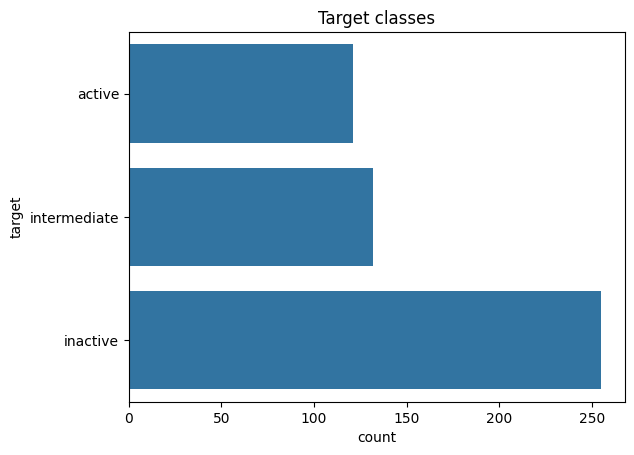

In [22]:
sns.countplot(lox_basic['target'])
plt.title('Target classes')
plt.show()

In [23]:
#save the new dataset! 
lox_basic.to_csv('lox_basic.csv', index=False)

In [24]:
lox_basic = pd.read_csv('lox_basic.csv')

In [25]:
# "." in the smiles record shows a disconnected structure! 

[x for x in lox_basic['canonical_smiles'] if '.' in x]

['C[C@@]12CCC(=O)c3coc(c31)C(=O)c1cc3c(O)ccc(OS(=O)(=O)[O-])c3cc12.[Na+]',
 'CC1=CC[C@H]2C(C)(C)CCC[C@]2(C)[C@H]1C[C@@H](OS(=O)(=O)[O-])[C@H](C)CCC/C(C)=C/Cc1cc(O)ccc1O.[Na+]']

In [26]:
#so we remove the dots from the smiles! 

for i,x in enumerate(lox_basic['canonical_smiles']):
    smiles = x.split('.')
    lox_basic.loc[i, 'canonical_smiles'] = max(smiles, key=len) #How does this line work??
    
lox_basic.head()

,molecule_chembl_id,canonical_smiles,standard_value,target
0,CHEMBL177598,O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(Cl)cc1O,400.0,active
1,CHEMBL175216,Cc1ccc(C(=O)Nc2ccc(CCc3ccc(O)c(O)c3)cc2)c(O)c1,400.0,active
2,CHEMBL52,CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1,4900.0,intermediate
3,CHEMBL176728,O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(-c2ccccc...,25000.0,inactive
4,CHEMBL172429,COc1cc(CCc2ccc(NC(=O)c3ccc(C)cc3O)cc2)ccc1O,25000.0,inactive


In [27]:
[x for x in lox_basic['canonical_smiles'] if '.' in x] #No we see it is none, smiles has no dots ! 

[]

#Data exploration! 

The Lipinski's Rule stated the following:

    Molecular weight < 500 Dalton
    Octanol-water partition coefficient (LogP) < 5
    Hydrogen bond donors < 5
    Hydrogen bond acceptors < 10


In [28]:
for i, x in enumerate(lox_basic['canonical_smiles']): #i index, x record! 
     
    mol = Chem.MolFromSmiles(x)
    lox_basic.loc[i,'mol_wt'] = Descriptors.MolWt(mol)
    lox_basic.loc[i,'mol_logp'] = Descriptors.MolLogP(mol)
    lox_basic.loc[i,'num_H_don'] = Descriptors.NumHDonors(mol)
    lox_basic.loc[i,'num_H_acpt'] = Descriptors.NumHAcceptors(mol)
    
lox_basic.head()

,molecule_chembl_id,canonical_smiles,standard_value,target,mol_wt,mol_logp,num_H_don,num_H_acpt
0,CHEMBL177598,O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(Cl)cc1O,400.0,active,383.831,4.49430,4.0,4.0
1,CHEMBL175216,Cc1ccc(C(=O)Nc2ccc(CCc3ccc(O)c(O)c3)cc2)c(O)c1,400.0,active,363.413,4.14932,4.0,4.0
2,CHEMBL52,CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1,4900.0,intermediate,302.370,3.56640,4.0,4.0
3,CHEMBL176728,O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(-c2ccccc...,25000.0,inactive,425.484,5.50790,4.0,4.0
4,CHEMBL172429,COc1cc(CCc2ccc(NC(=O)c3ccc(C)cc3O)cc2)ccc1O,25000.0,inactive,377.440,4.45232,3.0,4.0


In [29]:
lox_basic.describe()

,standard_value,mol_wt,mol_logp,num_H_don,num_H_acpt
count,475.000000,508.000000,508.000000,508.000000,508.000000
mean,29379.764211,339.156177,4.096021,1.834646,3.655512
std,43527.683350,108.435680,1.555806,1.147942,1.513069
min,1.000000,117.151000,0.591100,0.000000,1.000000
25%,1000.000000,258.111500,2.956795,1.000000,3.000000
50%,10000.000000,319.656500,3.878740,2.000000,3.000000
75%,47650.000000,399.834000,4.931250,2.000000,4.000000
max,500000.000000,1019.130000,10.700200,8.000000,10.000000


In [30]:
#save dataset to csv again! 

lox_basic.to_csv('lox_basic_lipinski.csv')

In [31]:
lipinski = pd.read_csv('lox_basic_lipinski.csv')
lipinski.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,target,mol_wt,mol_logp,num_H_don,num_H_acpt
0,0,CHEMBL177598,O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(Cl)cc1O,400.0,active,383.831,4.49430,4.0,4.0
1,1,CHEMBL175216,Cc1ccc(C(=O)Nc2ccc(CCc3ccc(O)c(O)c3)cc2)c(O)c1,400.0,active,363.413,4.14932,4.0,4.0
2,2,CHEMBL52,CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1,4900.0,intermediate,302.370,3.56640,4.0,4.0
3,3,CHEMBL176728,O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(-c2ccccc...,25000.0,inactive,425.484,5.50790,4.0,4.0
4,4,CHEMBL172429,COc1cc(CCc2ccc(NC(=O)c3ccc(C)cc3O)cc2)ccc1O,25000.0,inactive,377.440,4.45232,3.0,4.0


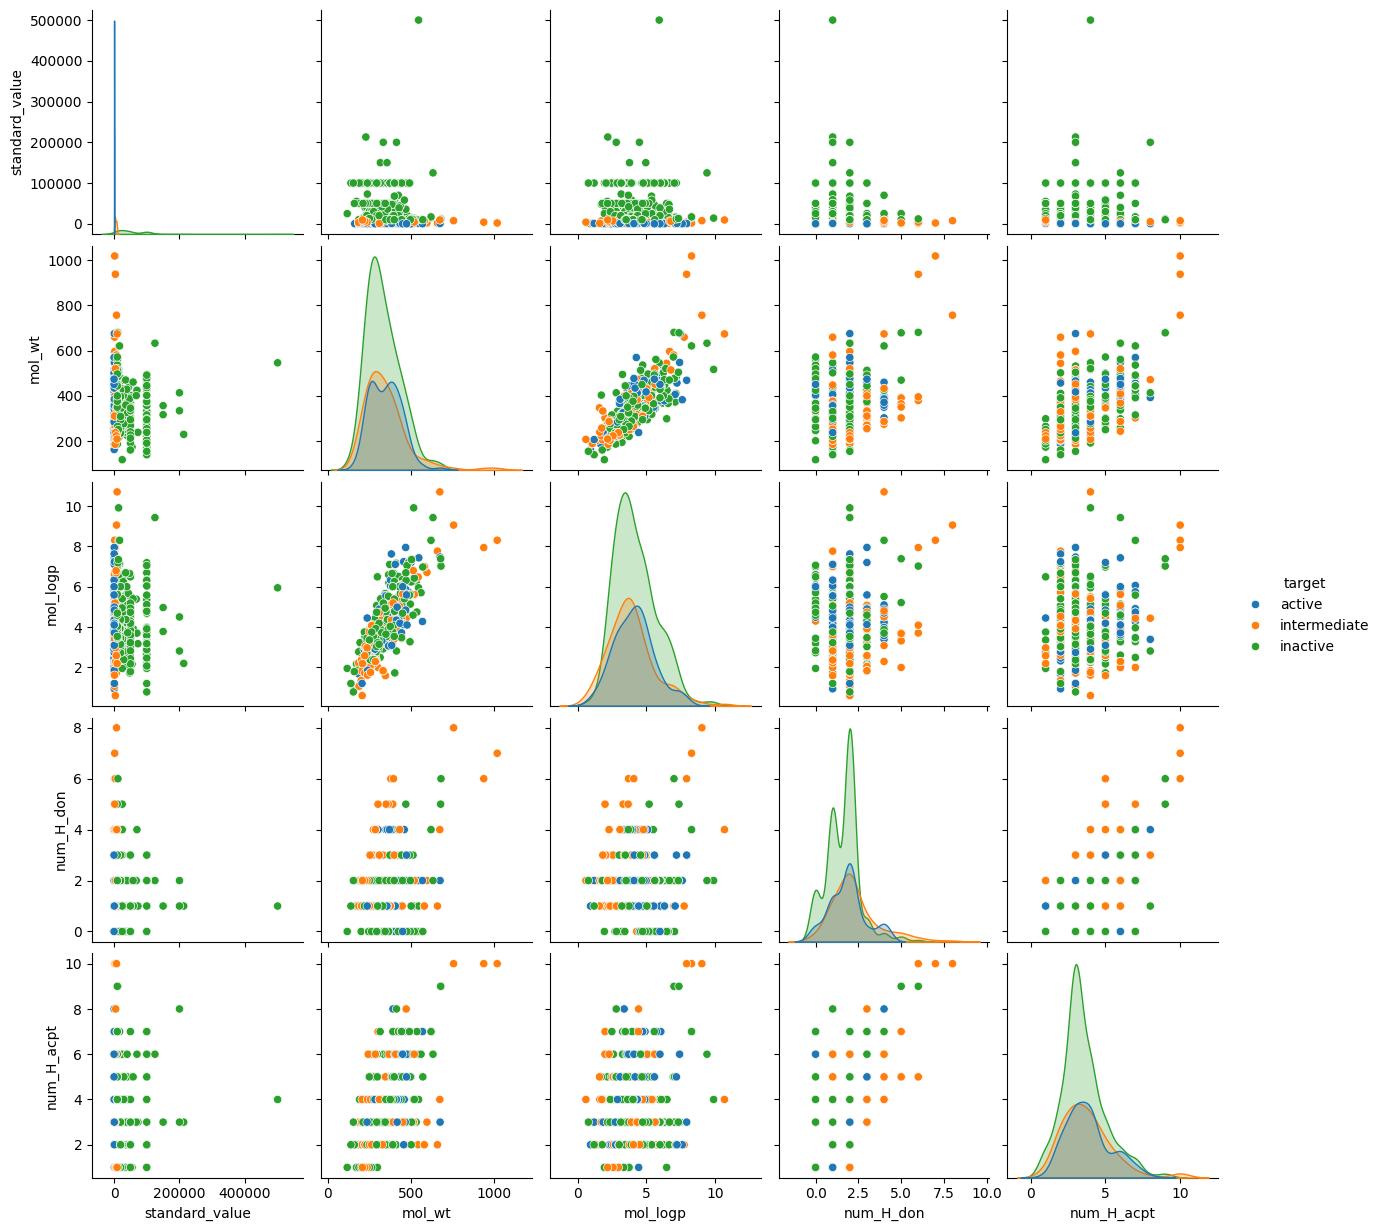

In [32]:
#To find are their any patterns from the dataset! 

sns.pairplot(lox_basic, hue='target')

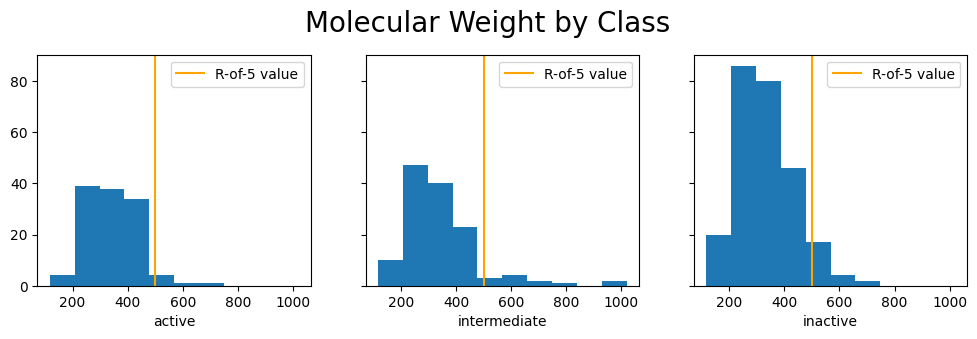

-----------------------------------------------------------------------------------------------




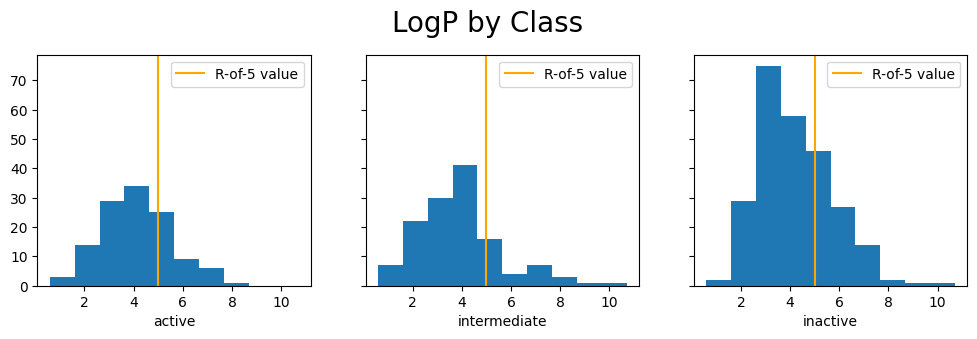

-----------------------------------------------------------------------------------------------




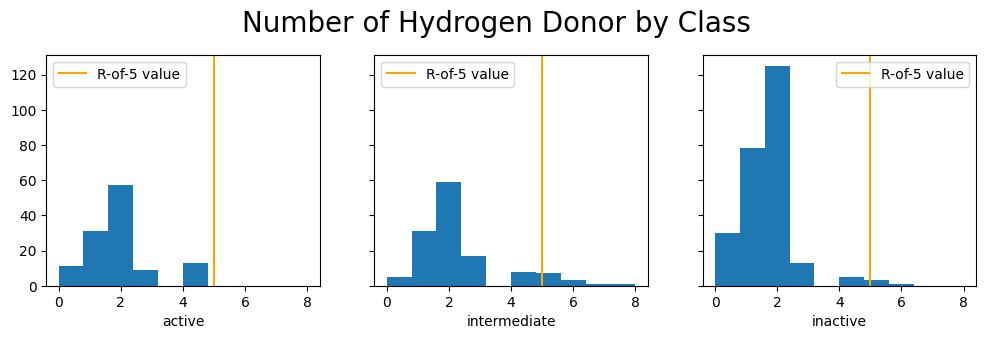

-----------------------------------------------------------------------------------------------




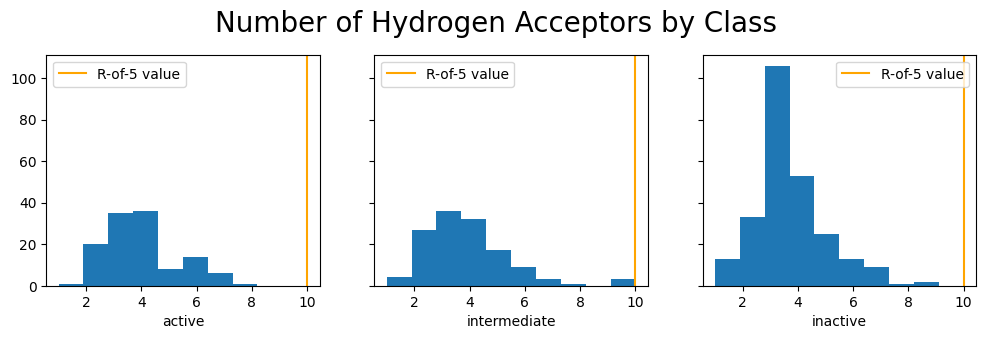

-----------------------------------------------------------------------------------------------




In [33]:


# What is the distribution of the classes for the various features?

# Define features and classes
columns = lox_basic.columns[4:]
classes = ['active', 'intermediate', 'inactive']

# Define the Rule-of-Five criteria
lines = {'mol_wt': 500, 'mol_logp': 5, 'num_H_don': 5, 'num_H_acpt':10}
# Create better titles
titles = {'mol_wt': 'Molecular Weight by Class', 
          'mol_logp': 'LogP by Class', 
          'num_H_don': 'Number of Hydrogen Donor by Class', 
          'num_H_acpt': 'Number of Hydrogen Acceptors by Class'}

# Plot distribution of each feature for each class
for column in columns:
    fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
    for i in range(3):
        ax[i].hist(lox_basic[column].loc[lox_basic['target']==classes[i]],
                   range=(lox_basic[column].min(), lox_basic[column].max())) 
        ax[i].set_xlabel(classes[i])
        # Add line to show the Rule-of-Five criteria for each feature
        ax[i].axvline(x=lines.get(column), color='orange', label="R-of-5 value")
        ax[i].legend()
    title = plt.suptitle(titles.get(column), fontsize=20)
    title.set_y(1.03)
    plt.show()
    # Calculate and print Mann Whitney U test statistcs & p-values for
    # each feature for each class pair
    #ut.mannwhitney(lipinski, column)
    # Adding whitespace between feature information
    print('-----------------------------------------------------------------------------------------------')
    print()
    print()



In [35]:
#Download the software padel to collect the features from the chemical compounds! thanks to them! 

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh


--2024-01-03 07:48:19--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-01-03 07:48:20--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
Unable to establish SSL connection.
--2024-01-03 07:48:20--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Locat

In [36]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/     
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  


In [37]:
#prepare the lipinski dataset to fed into the padel program! 
#we need only canonical smiles and chEMBL id to work with here! 

selection = ['canonical_smiles','molecule_chembl_id']
for_modeling = lipinski[selection]

#save the file as the required  .smi file type! 
for_modeling.to_csv('molecules.smi', sep='\t', index=False, header=False)

In [38]:
#view the first 5 rows in the saved dataset! 
! cat molecules.smi | head -5

O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(Cl)cc1O	CHEMBL177598
Cc1ccc(C(=O)Nc2ccc(CCc3ccc(O)c(O)c3)cc2)c(O)c1	CHEMBL175216
CC(Cc1ccc(O)c(O)c1)C(C)Cc1ccc(O)c(O)c1	CHEMBL52
O=C(Nc1ccc(CCc2ccc(O)c(O)c2)cc1)c1ccc(-c2ccccc2)cc1O	CHEMBL176728
COc1cc(CCc2ccc(NC(=O)c3ccc(C)cc3O)cc2)ccc1O	CHEMBL172429


cat: write error: Invalid argument


In [39]:
#check the new dataset contains the same number of rows
#Number of rows in the previous dataframe

len(lipinski)

508

In [40]:
! cat molecules.smi | wc -l

508


In [41]:
#Look at file information! 
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [42]:
! bash padel.sh

padel.sh: line 1: java: command not found


In [43]:
#load and view the first 5 rows of the dataset created by padel program! 

df3_X = pd.read_csv('descriptors_output.csv')
df3_X.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL52,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL177598,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL172429,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL367410,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL177098,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df3_X.describe()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
count,508.000000,508.000000,508.000000,508.000000,508.0,508.0,508.0,508.0,508.0,508.0,...,508.0,508.0,508.0,508.0,508.0,508.0,508.0,508.0,508.0,508.0
mean,0.992126,0.881890,0.488189,0.043307,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.088473,0.323057,0.500353,0.203748,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
#chemblID is not needed for model training! We can keep them aside! 

In [46]:
X = df3_X.set_index('Name') #Now the NAME is becoming the index! 
X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
Name,,,,,,,,,,,,,,,,,,,,,
CHEMBL52,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL177598,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL172429,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL367410,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL177098,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#As we see here dataset is ready, X. We need target column, Y.

lipinski = pd.read_csv('lox_basic_lipinski.csv')
y = lipinski['target']

In [48]:
y

0            active
1            active
2      intermediate
3          inactive
4          inactive
           ...     
503        inactive
504        inactive
505        inactive
506        inactive
507          active
Name: target, Length: 508, dtype: object

In [49]:
#We handle binary classification problem! and we dont need intermediate class here! 

y.where(y=='active','inactive',inplace=True)
y.value_counts(normalize=True)

target
inactive    0.761811
active      0.238189
Name: proportion, dtype: float64

In [50]:
y = y.map({'active' : 1, 'inactive' : 0})
y

0      1
1      1
2      0
3      0
4      0
      ..
503    0
504    0
505    0
506    0
507    1
Name: target, Length: 508, dtype: int64

In [51]:
y.value_counts()

target
0    387
1    121
Name: count, dtype: int64

In [52]:
#split the data into test, train, keeping the index for later use!!
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, X.index, test_size=0.2,
                                                                                random_state=12)

In [53]:
X_train.shape

(406, 881)

In [54]:
#delete the low variance features! 

selection = VarianceThreshold(threshold=(.8 * (1-.8)))

#Fit the training data! 

selection.fit(X_train)


#select only the higher variance features!

X_train = X_train[X_train.columns[selection.get_support(indices=True)]]
X_test = X_test[X_test.columns[selection.get_support(indices=True)]]

In [55]:
X_train.shape #Deleted low variance features and now we have only 170 to train! 



(406, 174)

In [56]:
X_train.to_csv('X_descriptors.csv',index=False)

In [57]:
X_train

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP19,PubchemFP20,PubchemFP37,PubchemFP143,PubchemFP145,PubchemFP146,...,PubchemFP704,PubchemFP712,PubchemFP714,PubchemFP735,PubchemFP756,PubchemFP761,PubchemFP777,PubchemFP798,PubchemFP819,PubchemFP824
Name,,,,,,,,,,,,,,,,,,,,,
CHEMBL391341,1,1,0,0,1,1,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
CHEMBL1718182,0,0,1,1,0,0,0,1,1,1,...,0,0,0,0,1,0,0,0,1,0
CHEMBL2088234,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
CHEMBL1736078,1,1,1,1,1,0,0,1,1,1,...,1,0,1,0,1,0,1,0,1,0
CHEMBL4441796,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL3262912,0,1,1,1,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
CHEMBL3259851,0,0,1,1,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
CHEMBL1611217,1,1,1,1,1,0,0,1,1,1,...,1,0,1,0,1,0,1,0,1,0


In [59]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [60]:
print(type(df3_X))

<class 'pandas.core.frame.DataFrame'>


In [66]:
data_new = pd.concat([df3_X,lipinski['target']], ignore_index=True, sort=False)

In [68]:
lipinski['target']

0        active
1        active
2      inactive
3      inactive
4      inactive
         ...   
503    inactive
504    inactive
505    inactive
506    inactive
507      active
Name: target, Length: 508, dtype: object

In [69]:
data_new

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,0
0,CHEMBL52,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,CHEMBL177598,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,CHEMBL172429,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,CHEMBL367410,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,CHEMBL177098,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inactive
1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inactive
1013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inactive
1014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inactive


In [ ]:
#Modeling! 
#Model comparison! and we use lazy predict library to be able to compare the different classifications!

clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None,random_state=6)
models,predictions = clf.fit(X_train,X_test,y_train,y_test)
models

In [ ]:
# Instantiate, fit and evaluate an SVC model
svc = SVC(class_weight='balanced', random_state=6)
svc = svc.fit(X_train, y_train)
ut.evaluate(svc, X_train, X_test, y_train, y_test)